In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('Data Set.xlsx')

In [3]:
# before starting with the clustering checking for any missing values/anomalies 

In [4]:
# checking the data type

In [5]:
df.dtypes

CustomerID               int64
Age                      int64
Device                  object
City                    object
Product                 object
Price                  float64
Quantity                 int64
PurchaseDate    datetime64[ns]
BrowsingTime             int64
dtype: object

In [6]:
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10


In [7]:
df.isnull().sum()

CustomerID      0
Age             0
Device          0
City            0
Product         0
Price           0
Quantity        0
PurchaseDate    0
BrowsingTime    0
dtype: int64

In [8]:
# data seems to be clean

In [9]:
df.describe()

,CustomerID,Age,Price,Quantity,BrowsingTime
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49995.401950,44.056690,12499.116588,5.508530,10.007630
std,28889.584888,15.298008,22943.009995,2.872739,6.062808
min,3.000000,18.000000,100.157985,1.000000,0.000000
25%,24926.500000,31.000000,1751.335410,3.000000,5.000000
50%,50024.000000,44.000000,4516.202837,6.000000,10.000000
75%,75072.000000,57.000000,11391.843495,8.000000,15.000000
max,99999.000000,70.000000,199988.317638,10.000000,20.000000


In [10]:
# proceeding the clustering techniques for customer segmentation

In [11]:
df

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10
...,...,...,...,...,...,...,...,...,...
99995,43568,60,Mobile,Srinagar,Gaming Console,37964.020836,4,2023-11-13 13:35:02,0
99996,60169,60,Tablet,Srinagar,Printer,2614.051519,5,2022-07-31 14:08:30,8
99997,50955,35,Mobile,Delhi,Bluetooth Speaker,4465.469808,8,2021-07-04 22:35:21,10
99998,86160,23,Mobile,Vadodara,Earbuds,506.209955,8,2024-02-12 17:56:37,19


In [12]:
df2 = df[['Age','Price','Quantity','BrowsingTime']]

In [13]:
df2

,Age,Price,Quantity,BrowsingTime
0,42,4441.406091,2,9
1,26,35274.014252,6,1
2,61,784.924822,2,20
3,24,11000.476305,8,8
4,60,2814.737205,5,10
...,...,...,...,...
99995,60,37964.020836,4,0
99996,60,2614.051519,5,8
99997,35,4465.469808,8,10
99998,23,506.209955,8,19


In [14]:
ss = StandardScaler()
trans = ss.fit_transform(df2)
df1 = pd.DataFrame(trans,columns=df2.columns)

In [15]:
df1

,Age,Price,Quantity,BrowsingTime
0,-0.134442,-0.351207,-1.221325,-0.166199
1,-1.180335,0.992678,0.171081,-1.485727
2,1.107556,-0.510580,-1.221325,1.648151
3,-1.311072,-0.065320,0.867285,-0.331140
4,1.042187,-0.422108,-0.177020,-0.001258
...,...,...,...,...
99995,1.042187,1.109925,-0.525122,-1.650668
99996,1.042187,-0.430855,-0.177020,-0.331140
99997,-0.592021,-0.350158,0.867285,-0.001258
99998,-1.376440,-0.522729,0.867285,1.483210


In [16]:
err =[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df1)
    err.append(km.inertia_)

In [17]:
err

[400000.0000000003,
 324162.4200496355,
 262084.21358132618,
 217233.068875194,
 182056.5925648141,
 159997.23327622892,
 140000.9122952269,
 127329.52539804453,
 115636.02768078248,
 107292.23353788946]

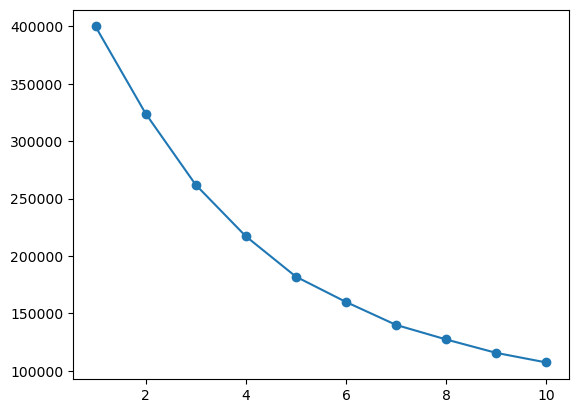

In [18]:
plt.plot(range(1,11),err,marker='o')

In [19]:
model = KMeans(n_clusters = 3, random_state=100)
model.fit(df1)

KMeans(n_clusters=3, random_state=100)

In [20]:
df2['label'] = model.labels_

In [21]:
df2

,Age,Price,Quantity,BrowsingTime,label
0,42,4441.406091,2,9,1
1,26,35274.014252,6,1,1
2,61,784.924822,2,20,2
3,24,11000.476305,8,8,1
4,60,2814.737205,5,10,2
...,...,...,...,...,...
99995,60,37964.020836,4,0,2
99996,60,2614.051519,5,8,2
99997,35,4465.469808,8,10,1
99998,23,506.209955,8,19,1


<Axes: xlabel='Age', ylabel='Price'>

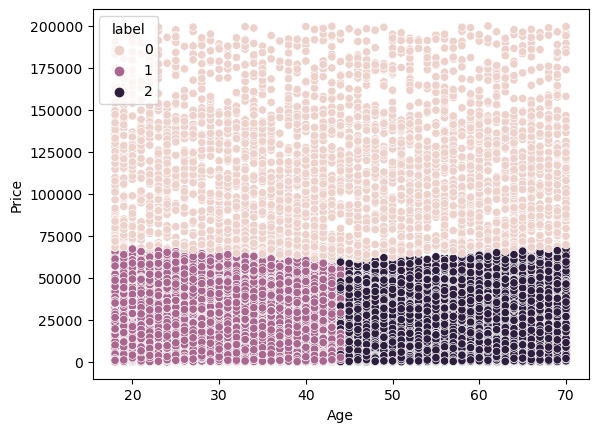

In [22]:
sns.scatterplot(x=df2['Age'],y=df2['Price'],hue=df2['label'])

In [23]:
# three major clusters

In [24]:
# cluster1
# people between the ages 20 to 45 who purchase items of lower cost

# cluster 2
# people between between the ages 45 to 70 who purchase items of lower cost

# cluster 3
# people of all the ages who purchase the items that are of the higher cost

In [25]:
# will be briefly discussed in the report

In [38]:
# Feature engineering is done to get better insights about the data

In [26]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 35, 55, 70], labels=['Young Adults', 'Middle-Aged Adults', 'Old-Aged Adults'])

In [27]:
df['PurchaseMonth'] = df['PurchaseDate'].dt.month

In [28]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Post-Monsoon'
    else:
        return 'Winter'

df['Season'] = df['PurchaseMonth'].apply(get_season)

In [29]:
df = df.drop('PurchaseMonth',axis=1)

In [30]:
df['Moneyspent'] = df['Price'] * df['Quantity']

In [31]:
city_price = df.groupby('City')['Moneyspent'].mean()
city_price.sort_values(ascending=False).head(7)

City
Lucknow      74447.565671
Allahabad    74303.494050
Ahmedabad    74207.195348
Mysore       73734.409122
Hyderabad    73540.630927
Surat        73183.981024
Bareilly     72593.013213
Name: Moneyspent, dtype: float64

<Axes: xlabel='AgeGroup', ylabel='Moneyspent'>

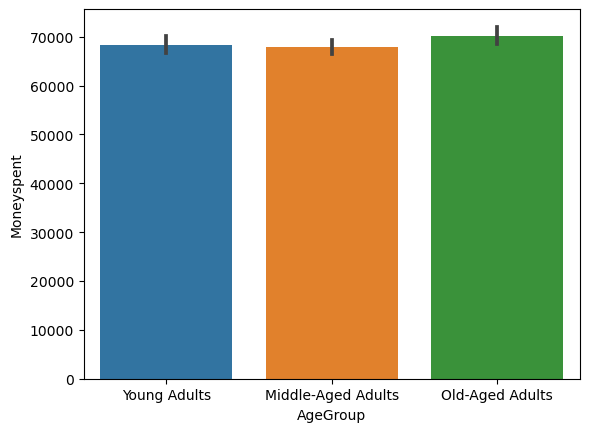

In [32]:
sns.barplot(x=df['AgeGroup'],y=df['Moneyspent'])

In [33]:
df.groupby('AgeGroup')['Moneyspent'].mean()

AgeGroup
Young Adults          68391.062729
Middle-Aged Adults    67882.663981
Old-Aged Adults       70214.096492
Name: Moneyspent, dtype: float64

<Axes: ylabel='Moneyspent'>

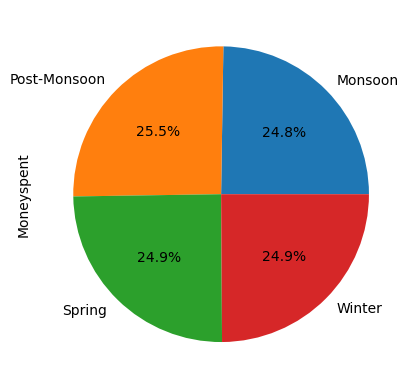

In [34]:
df.groupby('Season')['Moneyspent'].mean().plot(kind='pie',autopct='%1.1f%%')

In [35]:
# insights are given in the report

In [36]:
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,AgeGroup,Season,Moneyspent
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9,Middle-Aged Adults,Monsoon,8882.812181
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1,Young Adults,Post-Monsoon,211644.085513
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20,Old-Aged Adults,Winter,1569.849644
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8,Young Adults,Winter,88003.810440
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10,Old-Aged Adults,Monsoon,14073.686023


In [37]:
df.to_csv('output.csv', index=False)

# Kindly check the Final Report.pdf for the overall summary